### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### Data Collection

In [2]:
sonar_data = pd.read_csv('data.csv',header=None)

In [3]:
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


### Data Preprocessing

In [4]:
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [5]:
sonar_data[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [6]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [7]:
X = sonar_data.drop(60,axis = 1)
y = sonar_data[60]

In [8]:
X.shape

(208, 60)

In [9]:
y.shape

(208,)

In [10]:
scaler = MinMaxScaler()

In [11]:
scaled_data = scaler.fit_transform(X)

In [12]:
scaled_data[0]

array([0.13643068, 0.15645092, 0.13567674, 0.03542558, 0.22495562,
       0.23757055, 0.40746753, 0.34090408, 0.4492818 , 0.28571429,
       0.1871544 , 0.19724502, 0.29566719, 0.03836238, 0.0630956 ,
       0.21483818, 0.28504818, 0.27262338, 0.48222175, 0.44317209,
       0.55554384, 0.4960638 , 0.39896153, 0.54410409, 0.6630123 ,
       0.60513272, 0.69576636, 0.80238781, 0.67441153, 0.34558432,
       0.08991826, 0.24713548, 0.48766145, 0.77742448, 0.8503631 ,
       0.84949597, 0.69330855, 0.59415618, 0.48197343, 0.28616558,
       0.01737116, 0.33919414, 0.36531747, 0.54831229, 0.37546204,
       0.19007131, 0.19032959, 0.40221623, 0.1933367 , 0.39272727,
       0.2310757 , 0.02710414, 0.15584416, 0.43567251, 0.14965986,
       0.41794872, 0.50284091, 0.18535469, 0.24517906, 0.06004619])

In [13]:
le = LabelEncoder()
encoded_labels = le.fit_transform(y)

In [14]:
encoded_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [15]:
# 1 -> Rock
# 0 -> Mine

### Train_Test_Splits

In [16]:
x_train,x_test,y_train,y_test = train_test_split(scaled_data, encoded_labels, test_size = 0.2, stratify = encoded_labels)

In [17]:
x_train.shape

(166, 60)

In [18]:
y_train.shape

(166,)

In [19]:
x_test.shape

(42, 60)

In [20]:
y_test.shape

(42,)

### Models Training with GridSearchCV

In [21]:
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

def gridsearchcv(X, y):
    algos = {
        'naive_bayes': {
            'model': GaussianNB(),
            'params': {
               'priors' : [None]
            }
        },
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'min_samples_split': [40]
            }
        },
        'random_forest': {
            'model': RandomForestClassifier(),
            'params': {
                'criterion' : ['gini']
            }
        },
        'logistic_regression': {
            'model': LogisticRegression(max_iter=1000),
            'params': {
                'solver': ['liblinear', 'saga'],
                'penalty': ['l1', 'l2']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gscv = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gscv.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gscv.best_score_,
            'best_params': gscv.best_params_
        })
        best_estimator = gscv.best_estimator_
        pickle.dump(best_estimator, open(f'{algo_name}_model.p', 'wb'))

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

In [22]:
stats = gridsearchcv(x_train,y_train)

In [23]:
stats.to_csv('stats.csv')

In [24]:
stats

,model,best_score,best_params
0,naive_bayes,0.717647,{'priors': None}
1,decision_tree,0.711765,{'min_samples_split': 40}
2,random_forest,0.800000,{'criterion': 'gini'}
3,logistic_regression,0.800000,"{'penalty': 'l2', 'solver': 'liblinear'}"


### Models Evaluation

#### Decision Trees Model Evaluation

In [25]:
with open('decision_tree_model.p', 'rb') as file:
    model1 = pickle.load(file)

In [26]:
model1.score(x_train,y_train)

0.8855421686746988

In [27]:
model1.score(x_test,y_test)

0.6428571428571429

Text(58.222222222222214, 0.5, 'Truth')

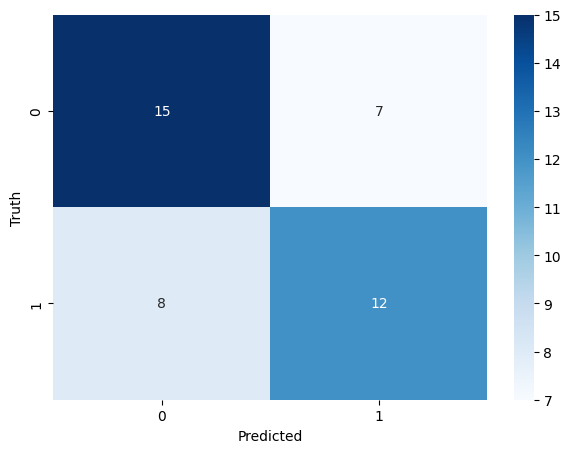

In [28]:
cm = confusion_matrix(y_test, model1.predict(x_test))
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Random Forest Model Evaluation

In [29]:
with open('random_forest_model.p', 'rb') as file:
    model2 = pickle.load(file)

In [30]:
model2.score(x_train,y_train)

1.0

In [31]:
model2.score(x_test,y_test)

0.9523809523809523

Text(58.222222222222214, 0.5, 'Truth')

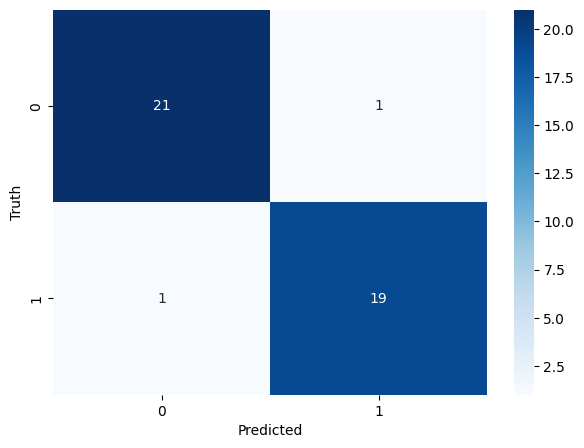

In [32]:
cm = confusion_matrix(y_test, model2.predict(x_test))
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Naive Bayes Model Evaluation

In [33]:
with open('naive_bayes_model.p', 'rb') as file:
    model3 = pickle.load(file)

In [34]:
model3.score(x_train,y_train)

0.7409638554216867

In [35]:
model3.score(x_test,y_test)

0.8095238095238095

Text(58.222222222222214, 0.5, 'Truth')

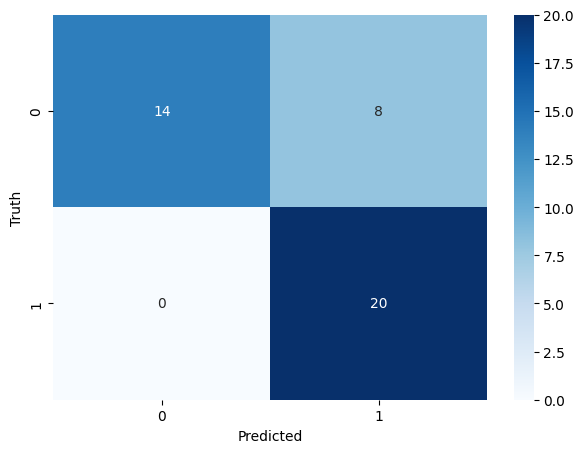

In [36]:
cm = confusion_matrix(y_test, model3.predict(x_test))
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Logistic Regression Model Evaluation

In [37]:
with open('logistic_regression_model.p', 'rb') as file:
    model4 = pickle.load(file)

In [38]:
model4.score(x_train,y_train)

0.8734939759036144

In [39]:
model4.score(x_test,y_test)

0.8095238095238095

Text(58.222222222222214, 0.5, 'Truth')

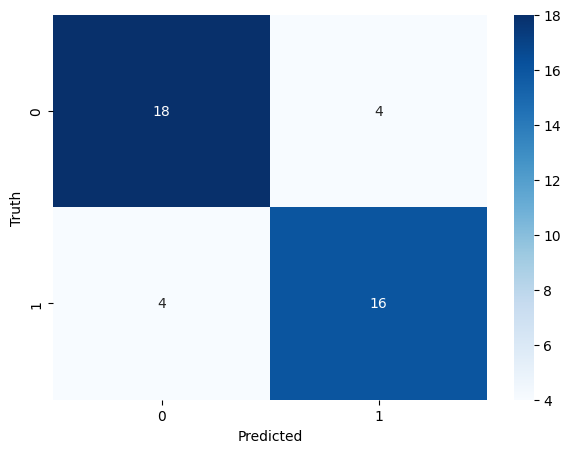

In [40]:
cm = confusion_matrix(y_test, model4.predict(x_test))
plt.figure(figsize = (7,5))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Truth')